In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import datetime
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
os.chdir(r"C:\Users\mese4\Documents\The Data incubator\project\cord-19_2020-07-01\2020-07-01")
df=pd.read_csv('metadata.csv', encoding='ISO-8859-1')


C:\Users\mese4\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,6,13,14,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#Get drug names database

df_drugs=pd.read_csv(r"C:\Users\mese4\Documents\The Data incubator\project\Drugmap\drugbank vocabulary.csv", encoding='ISO-8859-1')
df_drugs.head()

df_drugs

,DrugBank ID,Accession Numbers,Common name,CAS,UNII,Synonyms,Standard InChI Key
0,DB00001,BIOD00024 | BTD00024,Lepirudin,138068-37-8,Y43GF64R34,Hirudin variant-1 | Lepirudin recombinant,NaN
1,DB00002,BIOD00071 | BTD00071,Cetuximab,205923-56-4,PQX0D8J21J,Cetuximab | CÃ©tuximab | Cetuximabum,NaN
2,DB00003,BIOD00001 | BTD00001,Dornase alfa,143831-71-4,953A26OA1Y,Deoxyribonuclease (human clone 18-1 protein mo...,NaN
3,DB00004,BIOD00084 | BTD00084,Denileukin diftitox,173146-27-5,25E79B5CTM,Denileukin | Interleukin-2/diptheria toxin fus...,NaN
4,DB00005,BIOD00052 | BTD00052,Etanercept,185243-69-0,OP401G7OJC,Etanercept | etanercept-szzs | etanercept-ykro...,NaN
...,...,...,...,...,...,...,...
13575,DB15689,NaN,Azoximer bromide,892497-01-7,90G53638ZD,"Poly((1-(carboxymethyl)piperazin-1-ium-1,4-diy...",NaN
13576,DB15690,NaN,Fluoroestradiol F-18,94153-53-4,T32277KB09,(18F)FES | 16-alpha-(18-Fluoro)-17betaestradio...,KDLLNMRYZGUVMA-ZYMZXAKXSA-N
13577,DB15691,NaN,Anti-SARS-CoV-2 REGN-COV2,NaN,NaN,REGN10933+REGN10987 combination therapy,NaN
13578,DB15692,NaN,COVID-19 convalescent plasma,NaN,YM6LN8TU2V,Convalescent plasma (COVID-19),NaN


In [3]:
alias=df_drugs[df_drugs['Synonyms'].notnull()]

alias=alias['Synonyms']

alias=alias.tolist()


def aliases_lst(df_alias_lst):
    
    alias_lst=[]
    for x in alias:
        gn=x.split('|')
        alias_lst.append(gn)
    
    flat_list = []
    for sublist in alias_lst:
        for item in sublist:
            item=item.lower()
            flat_list.append(item)
    return flat_list

lst_alias_drugs=aliases_lst(alias) 

symbol=df_drugs['Common name']
symbol=symbol.tolist()
drug_check=symbol+lst_alias_drugs
drug_check
drug_check_lower=aliases_lst(drug_check)
drug_check_lower

['hirudin variant-1 ',
 ' lepirudin recombinant',
 'cetuximab ',
 ' cã©tuximab ',
 ' cetuximabum',
 'deoxyribonuclease (human clone 18-1 protein moiety) ',
 ' dornasa alfa ',
 ' dornase alfa, recombinant ',
 ' dornase alpha ',
 ' recombinant deoxyribonuclease (dnase)',
 'denileukin ',
 ' interleukin-2/diptheria toxin fusion protein',
 'etanercept ',
 ' etanercept-szzs ',
 ' etanercept-ykro ',
 ' recombinant human tnf ',
 ' rhu tnfr:fc ',
 ' rhu-tnfr:fc ',
 ' tnfr-immunoadhesin',
 'bivalirudin ',
 ' bivalirudina ',
 ' bivalirudinum',
 'leuprorelin ',
 ' leuprorelina ',
 ' leuproreline ',
 ' leuprorelinum',
 'peg-ifn alfa-2a ',
 ' peg-interferon alfa-2a ',
 ' peginterferon alfa-2a ',
 ' pegylated interfeaon alfa-2a ',
 ' pegylated interferon alfa-2a ',
 ' pegylated interferon alpha-2a ',
 ' pegylated-interferon alfa 2a',
 'alteplasa ',
 ' alteplase (genetical recombination) ',
 ' alteplase, recombinant ',
 ' alteplase,recombinant ',
 ' plasminogen activator (human tissue-type protein moi

In [4]:
df_genes=pd.read_csv(r"C:\Users\mese4\Documents\The Data incubator\project\genes_dataset\G-SynMiner_miner-geneHUGO.tsv",sep='\t')
#df_genes=df_genes.set_index('symbol')
df_genes

C:\Users\mese4\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (32,34,38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,# ensembl_gene_id,hgnc_id,symbol,name,locus_group,locus_type,status,location,location_sortable,alias_symbol,...,horde_id,merops,imgt,iuphar,kznf_gene_catalog,mamit-trnadb,cd,lncrnadb,enzyme_id,intermediate_filament_db
0,ENSG00000121410,HGNC:5,A1BG,alpha-1-B glycoprotein,protein-coding gene,gene with protein product,Approved,19q13.43,19q13.43,NaN,...,NaN,I43.950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ENSG00000268895,HGNC:37133,A1BG-AS1,A1BG antisense RNA 1,non-coding RNA,"RNA, long non-coding",Approved,19q13.43,19q13.43,FLJ23569,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ENSG00000148584,HGNC:24086,A1CF,APOBEC1 complementation factor,protein-coding gene,gene with protein product,Approved,10q21.1,10q21.1,ACF|ASP|ACF64|ACF65|APOBEC1CF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ENSG00000175899,HGNC:7,A2M,alpha-2-macroglobulin,protein-coding gene,gene with protein product,Approved,12p13.31,12p13.31,FWP007|S863-7|CPAMD5,...,NaN,I39.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ENSG00000245105,HGNC:27057,A2M-AS1,A2M antisense RNA 1 (head to head),non-coding RNA,"RNA, long non-coding",Approved,12p13.31,12p13.31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35649,ENSG00000162378,HGNC:25820,ZYG11B,"zyg-11 family member B, cell cycle regulator",protein-coding gene,gene with protein product,Approved,1p32.3,01p32.3,FLJ13456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35650,ENSG00000159840,HGNC:13200,ZYX,zyxin,protein-coding gene,gene with protein product,Approved,7q32,07q32,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35651,ENSG00000274572,HGNC:51695,ZYXP1,zyxin pseudogene 1,pseudogene,pseudogene,Approved,8q24.23,08q24.23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35652,ENSG00000074755,HGNC:29027,ZZEF1,zinc finger ZZ-type and EF-hand domain contain...,protein-coding gene,gene with protein product,Approved,17p13.3,17p13.3,KIAA0399|ZZZ4|FLJ10821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
alias=df_genes[df_genes['alias_symbol'].notnull()]

alias=alias['alias_symbol']

alias=alias.tolist()


def aliases_lst(df_alias_lst):
    
    alias_lst=[]
    for x in alias:
        gn=x.split('|')
        alias_lst.append(gn)
    
    flat_list = []
    for sublist in alias_lst:
        for item in sublist:
            item=item.lower()
            flat_list.append(item)
    return flat_list

lst_alias_gns=aliases_lst(alias) 

symbol=df_genes['symbol']
symbol=symbol.tolist()
gene_check=symbol+lst_alias_gns
gene_check
gene_check_lower=aliases_lst(gene_check)

In [6]:
gene_check_lower

['flj23569',
 'acf',
 'asp',
 'acf64',
 'acf65',
 'apobec1cf',
 'fwp007',
 's863-7',
 'cpamd5',
 'flj25179',
 'igbs3s',
 'igb3s',
 'a14galt',
 'gb3s',
 'p(k)',
 'alpha4gnt',
 'flj12389',
 'sur-5',
 'acsf1',
 'dac',
 'ces5a1',
 'mgc72001',
 'otthumg00000001887',
 'otthumg00000001889',
 'katii',
 'kat2',
 'flj11506',
 'p34',
 'kiaa1048',
 'dkfzp686k16132',
 'ptd015',
 'flj21035',
 'ck067',
 'snat',
 'ba234k24.2',
 'loc441376',
 'cmt2n',
 'kiaa1270',
 'ba444e17.1',
 'mgc2744',
 'nrps998',
 'lys2',
 'acsf4',
 'lys5',
 'cgi-80',
 'aasd-ppt',
 'acps',
 'lorsdh',
 'lkrsdh',
 'ded',
 'che-1',
 'che1',
 'bfr2',
 'aatyk',
 'kiaa0641',
 'lmtk1',
 'lmr1',
 'aatyk1',
 'ppp1r77',
 'inxs',
 'gabat',
 'tgd',
 'abc-c',
 'est111653',
 'lbm180',
 'ffm',
 'armd2',
 'cord3',
 'est90625',
 'est155051',
 'abcx',
 'kiaa0822',
 'est640918',
 'est698739',
 'est1133530',
 'flj14297',
 'dkfzp434g232',
 'li2',
 'flj33876',
 'flj33951',
 'p-gp',
 'cd243',
 'gp170',
 'abc20',
 'mdr2',
 'pfic-3',
 'gbd1',
 'est422562

In [7]:
rule = rrulewrapper(YEARLY, byeaster=1, interval=1)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')



In [8]:

df1=df['source_x']
def preprint(a):

    if 'BioRxiv' in a :
        return 'Preprint'
    elif 'MedRxiv' in a:
        return 'Preprint'
    elif 'ArXiv' in a:
        return 'Preprint'
    else:
        return 'Peer-Review'
    
a=[preprint(n) for n in df1]

df_abs = pd.DataFrame(a,columns =['preprint'])  
df_abs
df['preprint']=df_abs
df_19=df[(df['publish_time'] > '2019-12-01')]

df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df_19['year'] = df['publish_time'].dt.year
df_19['month'] = df['publish_time'].dt.month

df_19 ['year_month']= df_19['year'].map(str) + '-' + df_19['month'].map(str)

df_19.head()

C:\Users\mese4\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mese4\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mese4\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,preprint,year,month,year_month
4231,4tt0vnr4,aa3858e3cf21baa00c6f60272e4b59d3490129e0,PMC,CXCR6 regulates localization of tissue-residen...,10.1084/jem.20181308,PMC6888981,3.15586e+07,cc-by-nc-sa,Resident memory T cells (T(RM) cells) are an i...,2019-12-02,...,NaN,NaN,document_parses/pdf_json/aa3858e3cf21baa00c6f6...,document_parses/pmc_json/PMC6888981.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,Peer-Review,2019.0,12.0,2019.0-12.0
4234,9c0zrp7p,23d0641f1f78528bbf3fa7b0b749abc1299a9cb4,PMC,Local risk perception enhances epidemic control,10.1371/journal.pone.0225576,PMC6890219,3.17946e+07,cc-by,"As infectious disease outbreaks emerge, public...",2019-12-03,...,NaN,NaN,document_parses/pdf_json/23d0641f1f78528bbf3fa...,document_parses/pmc_json/PMC6890219.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,Peer-Review,2019.0,12.0,2019.0-12.0
4236,iaktm72a,9be8c80283a7fed59057d7788eb2850708f45450,PMC,Curcumin to Promote the Synthesis of Silver NP...,10.1038/s41598-019-54752-4,PMC6890765,3.17969e+07,cc-by,This work presents a simple one-pot protocol t...,2019-12-03,...,NaN,NaN,document_parses/pdf_json/9be8c80283a7fed59057d...,document_parses/pmc_json/PMC6890765.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,Peer-Review,2019.0,12.0,2019.0-12.0
4237,gcmpatlb,d5d29d1d48e1a4fe8f39d38639766c86dc976e5e,PMC,Factors that enable effective One Health colla...,10.1371/journal.pone.0224660,PMC6892547,3.18006e+07,cc-by,Advocates for a One Health approach recognize ...,2019-12-04,...,NaN,NaN,document_parses/pdf_json/d5d29d1d48e1a4fe8f39d...,document_parses/pmc_json/PMC6892547.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,Peer-Review,2019.0,12.0,2019.0-12.0
4246,k2monfg0,772046ceb62525b9f5c685e2d2b8dd33573107ba,PMC,Risk factors for the development of acute resp...,10.1186/s13054-019-2646-8,PMC6898929,3.18105e+07,cc-by,BACKGROUND: Clinical and epidemiological diffe...,2019-12-06,...,NaN,NaN,document_parses/pdf_json/772046ceb62525b9f5c68...,document_parses/pmc_json/PMC6898929.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,Peer-Review,2019.0,12.0,2019.0-12.0


In [15]:
df_19

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,preprint,year,month,year_month
4231,4tt0vnr4,aa3858e3cf21baa00c6f60272e4b59d3490129e0,PMC,CXCR6 regulates localization of tissue-residen...,10.1084/jem.20181308,PMC6888981,3.15586e+07,cc-by-nc-sa,Resident memory T cells (T(RM) cells) are an i...,2019-12-02,...,NaN,NaN,document_parses/pdf_json/aa3858e3cf21baa00c6f6...,document_parses/pmc_json/PMC6888981.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,Peer-Review,2019.0,12.0,2019.0-12.0
4234,9c0zrp7p,23d0641f1f78528bbf3fa7b0b749abc1299a9cb4,PMC,Local risk perception enhances epidemic control,10.1371/journal.pone.0225576,PMC6890219,3.17946e+07,cc-by,"As infectious disease outbreaks emerge, public...",2019-12-03,...,NaN,NaN,document_parses/pdf_json/23d0641f1f78528bbf3fa...,document_parses/pmc_json/PMC6890219.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,Peer-Review,2019.0,12.0,2019.0-12.0
4236,iaktm72a,9be8c80283a7fed59057d7788eb2850708f45450,PMC,Curcumin to Promote the Synthesis of Silver NP...,10.1038/s41598-019-54752-4,PMC6890765,3.17969e+07,cc-by,This work presents a simple one-pot protocol t...,2019-12-03,...,NaN,NaN,document_parses/pdf_json/9be8c80283a7fed59057d...,document_parses/pmc_json/PMC6890765.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,Peer-Review,2019.0,12.0,2019.0-12.0
4237,gcmpatlb,d5d29d1d48e1a4fe8f39d38639766c86dc976e5e,PMC,Factors that enable effective One Health colla...,10.1371/journal.pone.0224660,PMC6892547,3.18006e+07,cc-by,Advocates for a One Health approach recognize ...,2019-12-04,...,NaN,NaN,document_parses/pdf_json/d5d29d1d48e1a4fe8f39d...,document_parses/pmc_json/PMC6892547.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,Peer-Review,2019.0,12.0,2019.0-12.0
4246,k2monfg0,772046ceb62525b9f5c685e2d2b8dd33573107ba,PMC,Risk factors for the development of acute resp...,10.1186/s13054-019-2646-8,PMC6898929,3.18105e+07,cc-by,BACKGROUND: Clinical and epidemiological diffe...,2019-12-06,...,NaN,NaN,document_parses/pdf_json/772046ceb62525b9f5c68...,document_parses/pmc_json/PMC6898929.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,Peer-Review,2019.0,12.0,2019.0-12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169811,7dqr5adm,NaN,Medline; WHO,A cohort of patients with COVID-19 in a major ...,10.3390/jcm9061733,NaN,3.25127e+07,unk,Background: Since the confirmation of the firs...,2020,...,#32512688,NaN,NaN,NaN,https://doi.org/10.3390/jcm9061733; https://ww...,219553115.0,Peer-Review,2020.0,1.0,2020.0-1.0
169813,ajqbljai,76ca0fe38a7e8bc1b730be50658fa9cb2eb7e4f2; e33a...,Medline; PMC,Epidemiology of Covid-19 in a Long-Term Care F...,10.1056/nejmoa2005412,PMC7121761,3.22202e+07,no-cc,BACKGROUND: Long-term care facilities are high...,2020-03-27,...,NaN,NaN,document_parses/pdf_json/76ca0fe38a7e8bc1b730b...,document_parses/pmc_json/PMC7121761.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/32220208/;...,214683161.0,Peer-Review,2020.0,3.0,2020.0-3.0
169814,gsktliyd,24741265a77032e848afe0cd1745adda124818be,Elsevier; Medline; PMC,A SARS-CoV-2 familial cluster infection reveal...,10.1016/j.jiph.2020.05.018,PMC7250748,3.25055e+07,no-cc,Information on SARS-CoV-2 asymptomatic infecti...,2020-05-27,...,NaN,NaN,document_parses/pdf_json/24741265a77032e848afe...,document_parses/pmc_json/PMC7250748.xml.json,https://www.sciencedirect.com/science/article/...,218891131.0,Peer-Review,2020.0,5.0,2020.0-5.0
169817,9svgq9f1,75a2fe5ad9b6eb8caf30399b9440f7dd610a32d3; 4461...,Medline; PMC,Virusâvirus interactions impact the populati...,10.1073/pnas.1911083116,PMC6936719,3.18439e+07,cc-by,The human respiratory tract hosts a diverse co...,2019-12-26,...,NaN,NaN,document_parses/pdf_json/75a2fe5ad9b6eb8caf303...,document_parses/pmc_json/PMC6936719.xml.json,https://doi.org/10.1073/pnas.1911083116; https...,209388856.0,Peer-Revi

In [ ]:
sns.set_context("talk")
sns.set_style('darkgrid')

g = sns.catplot(x="year_month", hue="preprint", 

                data=df_19, kind="count",

                height=5, aspect=5)

g.savefig("publications_years.png")

In [9]:


##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

In [10]:

nltk.download('wordnet')

stop_words = set(stopwords.words("english"))
#new_words = ["using", "show", 'covid','patient','disease','patients','treatment','viral','data','including','coronavirus','health','study',"result",'unknown','2555','method','infection','day','case','however','moreover','conclusion','virus','patient', "large", "also", "iv", "one",'nan', "two", "new", "previously", "shown",'recently','promising']
#stop_words = stop_words.union(new_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mese4\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
len(df_19['abstract'])
dataset=df_19

In [32]:


#text = dataset['abstract'].translate(string.maketrans(“”,””), string.punctuation)
import string
#dataset['abstract_']=dataset['abstract'].str.replace('[{}]'.format(string.punctuation), '')
dataset['abstract_'] = dataset['abstract'].astype(str)
corpus = []
for i in range(0, len(dataset['abstract_'])):
    #Remove punctuations
    text = dataset['abstract_'].iloc[i]
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    #text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
   # text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split() 
    
    ##Stemming
    ps=PorterStemmer()    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

len(corpus)

C:\Users\mese4\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


82306

In [33]:
corpus

['resident memory cell (t(rm) cells) important first-line defense respiratory pathogens, unique contribution lung t(rm) cell population protective immunity factor govern localization different compartment lung well understood. here, show airway interstitial t(rm) cell distinct effector function cxcr6 control partitioning t(rm) cell within lung recruiting cd8 t(rm) cell airways. absence cxcr6 significantly decrease airway cd8 t(rm) cell due altered trafficking cxcr6(â\x88\x92/â\x88\x92) cell within lung, decreased survival airways. cxcl16, ligand cxcr6, localized primarily respiratory epithelium, mouse lacking cxcl16 also decreased cd8 t(rm) cell airways. finally, blocking cxcl16 inhibited steady-state maintenance airway t(rm) cells. thus, cxcr6/cxcl16 signaling axis control localization t(rm) cell different compartment lung maintains airway t(rm) cells.',
 'infectious disease outbreak emerge, public health agency often enact vaccination social distancing measure slow transmission. succ

In [21]:
corpus[1050]
dataset['corpus']=corpus

dataset.tail()



C:\Users\mese4\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,pdf_json_files,pmc_json_files,url,s2_id,preprint,year,month,year_month,abstract_,corpus
169811,7dqr5adm,NaN,Medline; WHO,A cohort of patients with COVID-19 in a major ...,10.3390/jcm9061733,NaN,3.25127e+07,unk,Background: Since the confirmation of the firs...,2020,...,NaN,NaN,https://doi.org/10.3390/jcm9061733; https://ww...,219553115.0,Peer-Review,2020.0,1.0,2020.0-1.0,Background Since the confirmation of the first...,background since confirmation first patient in...
169813,ajqbljai,76ca0fe38a7e8bc1b730be50658fa9cb2eb7e4f2; e33a...,Medline; PMC,Epidemiology of Covid-19 in a Long-Term Care F...,10.1056/nejmoa2005412,PMC7121761,3.22202e+07,no-cc,BACKGROUND: Long-term care facilities are high...,2020-03-27,...,document_parses/pdf_json/76ca0fe38a7e8bc1b730b...,document_parses/pmc_json/PMC7121761.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/32220208/;...,214683161.0,Peer-Review,2020.0,3.0,2020.0-3.0,BACKGROUND Longterm care facilities are highri...,background longterm care facility highrisk set...
169814,gsktliyd,24741265a77032e848afe0cd1745adda124818be,Elsevier; Medline; PMC,A SARS-CoV-2 familial cluster infection reveal...,10.1016/j.jiph.2020.05.018,PMC7250748,3.25055e+07,no-cc,Information on SARS-CoV-2 asymptomatic infecti...,2020-05-27,...,document_parses/pdf_json/24741265a77032e848afe...,document_parses/pmc_json/PMC7250748.xml.json,https://www.sciencedirect.com/science/article/...,218891131.0,Peer-Review,2020.0,5.0,2020.0-5.0,Information on SARSCoV2 asymptomatic infection...,information sarscov2 asymptomatic infection in...
169817,9svgq9f1,75a2fe5ad9b6eb8caf30399b9440f7dd610a32d3; 4461...,Medline; PMC,Virusâvirus interactions impact the populati...,10.1073/pnas.1911083116,PMC6936719,3.18439e+07,cc-by,The human respiratory tract hosts a diverse co...,2019-12-26,...,document_parses/pdf_json/75a2fe5ad9b6eb8caf303...,document_parses/pmc_json/PMC6936719.xml.json,https://doi.org/10.1073/pnas.1911083116; https...,209388856.0,Peer-Review,2019.0,12.0,2019.0-12.0,The human respiratory tract hosts a diverse co...,human respiratory tract host diverse community...
169818,ch8hpw62,a1bc169fd52d551ae00c757983678495780e820c,Medline; PMC,Common breaches in biosafety during donning an...,10.1007/s12630-020-01648-x,PMC7155949,3.22916e+07,no-cc,NaN,2020-04-14,...,document_parses/pdf_json/a1bc169fd52d551ae00c7...,document_parses/pmc_json/PMC7155949.xml.json,https://doi.org/10.1007/s12630-020-01648-x; ht...,215760581.0,Peer-Review,2020.0,4.0,2020.0-4.0,nan,nan


In [ ]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [132]:
from sklearn.feature_extraction.text import CountVectorizer

import re

cv=CountVectorizer(max_df=0.9,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(genes_found)

#list(cv.vocabulary_.keys())[:10]

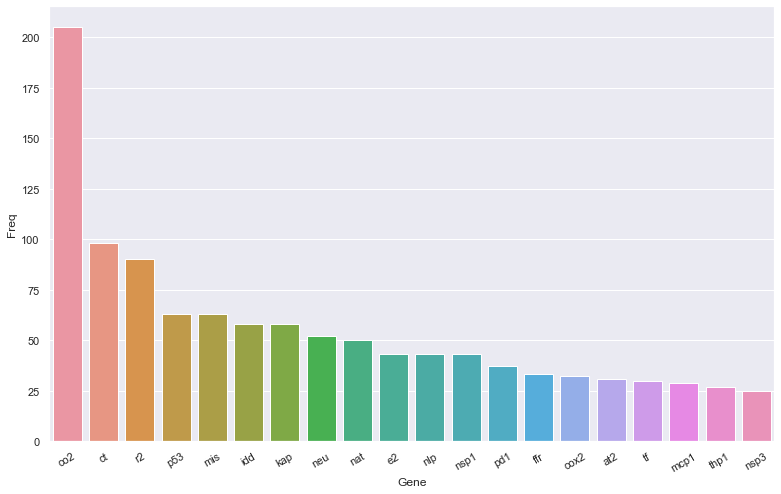

In [135]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(genes_found, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Gene", "Freq"]#Barplot of most freq words
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Gene", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

g.figure.savefig('most_frqu_gene.png')

In [ ]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
#print(top2_df)
#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)
h.figure.savefig('most_two_frqu.png')


In [ ]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)#Barplot of most freq Tri-grams
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)
j.figure.savefig('most_three_frqu.png')


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[1]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [ ]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])

In [ ]:
import sys
!{sys.executable} -m pip install wordcloud

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import datetime
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
os.chdir(r"C:\Users\mese4\Desktop\Python DM\Data science challange\project")
df=pd.read_csv('metadata.csv', encoding='ISO-8859-1')

rule = rrulewrapper(YEARLY, byeaster=1, interval=1)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')

#1st asset

df1=df['source_x']
def preprint(a):

    if 'biorxiv' in a :
        return 'Preprint'
    elif 'medrxiv' in a:
        return 'Preprint'
    else:
        return 'PMC'
    
a=[preprint(n) for n in df1]

df_abs = pd.DataFrame(a,columns =['preprint'])  
df_abs
df['preprint']=df_abs
df_19=df[(df['publish_time'] > '2019-12-01')]

df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df_19['year'] = df['publish_time'].dt.year
df_19['month'] = df['publish_time'].dt.month

df_19 ['year_month']= df_19['year'].map(str) + '-' + df_19['month'].map(str)

sns.set_context("talk")
sns.set_style('darkgrid')

g = sns.catplot(x="year_month", hue="preprint", 

                data=df_19, kind="count",

                height=5, aspect=5)

#2nd asset

In [ ]:
df = pd.DataFrame(gene_names)
df

In [ ]:
import pyensembl
ensembl = pyensembl.EnsemblRelease(99)
ensembl
#import sys
#!{sys.executable} -m pip install pyensembl

#!pyensembl install --release 75 99 --species human


gene_names = ensembl.gene_names(contig=None, strand=None)#(contig=6, position=29945884)


gene_names
genes_low=[]

for gene in gene_names:
    l=gene.lower()
    genes_low.append(l)
    
genes_low

In [ ]:
gene_names
genes_low=[]

for gene in gene_names:
    l=gene.lower()
    print(l)
    genes_low.append(l)
    
'nfe2l2' in genes_low


In [6]:
#Nanemd entity recognion for gene identification
import PySysrev, spacy, random
TRAIN_DATA = PySysrev.processAnnotations(project_id=3144,label='GENE')

#TRAIN_DATA[1]

In [2]:
nlp = spacy.blank('en')          # create a spacy model
nlp.meta['name'] = 'gene'        # name the model 'gene'

ner = nlp.create_pipe('ner')     # create an NER stage
ner.add_label('GENE')            # add the label 'GENE' to the stage

nlp.add_pipe(ner)                # put the pipe together
optimizer = nlp.begin_training() # get an optimizer for training the model

In [ ]:
for itn in range(200):
    random.shuffle(TRAIN_DATA)                     #shuffle examples 
    text = [item[0] for item in TRAIN_DATA]        #get training text items
    annotations = [item[1] for item in TRAIN_DATA] #get training annotations
    nlp.update(text, annotations, sgd=optimizer, drop=0.6)

In [ ]:
print('done')

In [40]:
#print('done')
nlp.to_disk(r"C:\Users\mese4\Documents\The Data incubator\project\Spacy model\gene_id_mode2")

In [24]:
nlp=nlp.from_disk(r"C:\Users\mese4\Documents\The Data incubator\project\Spacy model\gene_id_mode2")

In [39]:
doc = nlp("""Epigenetic Silencing of the mutL homolog 1 (MLH1) Promoter in
Relation to the Development of Gastric Cancer (GC) and its use as a
Biomarker for Patients with Microsatellite, CD8 and HIF-1α, HIF1 for the Covid19 gene N, 
trpm7 mmp8 mmp1 mmp2  and GAID2a, HNF4α, hnf4 ace2  ORF1b  a nrf2 , nucleoprotein1 , 
Nrf2 and brca2 Instability.""")


from spacy import displacy
displacy.render(doc,style="ent",jupyter=True,options={'distance':140})

In [77]:


#text = dataset['abstract'].translate(string.maketrans(“”,””), string.punctuation)
import string
dataset['abstract_']=dataset['abstract'].str.replace('[{}]'.format(string.punctuation), '')
dataset['abstract_'] = dataset['abstract_'].astype(str)
corpus = []

for i in range(0, 10):
    
    #Remove punctuations
    text = dataset['abstract_'].iloc[i]
    print(text)
    #gene_listsof_ls=get_all_genes(text)
    
    
    

Resident memory T cells TRM cells are an important firstline defense against respiratory pathogens but the unique contributions of lung TRM cell populations to protective immunity and the factors that govern their localization to different compartments of the lung are not well understood Here we show that airway and interstitial TRM cells have distinct effector functions and that CXCR6 controls the partitioning of TRM cells within the lung by recruiting CD8 TRM cells to the airways The absence of CXCR6 significantly decreases airway CD8 TRM cells due to altered trafficking of CXCR6ââ cells within the lung and not decreased survival in the airways CXCL16 the ligand for CXCR6 is localized primarily at the respiratory epithelium and mice lacking CXCL16 also had decreased CD8 TRM cells in the airways Finally blocking CXCL16 inhibited the steadystate maintenance of airway TRM cells Thus the CXCR6CXCL16 signaling axis controls the localization of TRM cells to different compartments of th

C:\Users\mese4\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mese4\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:

text = dataset['abstract']
#gene_listsof_ls=get_all_genes(text)

#gene_listsof_ls[:20]
text=text.tolist()
text

['Resident memory T cells (T(RM) cells) are an important first-line defense against respiratory pathogens, but the unique contributions of lung T(RM) cell populations to protective immunity and the factors that govern their localization to different compartments of the lung are not well understood. Here, we show that airway and interstitial T(RM) cells have distinct effector functions and that CXCR6 controls the partitioning of T(RM) cells within the lung by recruiting CD8 T(RM) cells to the airways. The absence of CXCR6 significantly decreases airway CD8 T(RM) cells due to altered trafficking of CXCR6(â\x88\x92/â\x88\x92) cells within the lung, and not decreased survival in the airways. CXCL16, the ligand for CXCR6, is localized primarily at the respiratory epithelium, and mice lacking CXCL16 also had decreased CD8 T(RM) cells in the airways. Finally, blocking CXCL16 inhibited the steady-state maintenance of airway T(RM) cells. Thus, the CXCR6/CXCL16 signaling axis controls the locali

In [31]:
def get_all_genes(lst_lst):
    gene_found=[]
    for lst in lst_lst:
        token=lst.split()
        if token in gene_check_lower:
            print(token)
            gene_found.append(a)
        
    return gene_found
a=get_all_genes(text)


KeyboardInterrupt: 

[]

In [92]:
def get_genes(en):#funtion to create a of names from caption
    
    
    genes = []
    
    
    doc=nlp(en)
    for token in doc:
        #print(token.ent_type_)
        if token.ent_type_ =='GENE': 
            
            genes.append(token) 
         
    return genes
    


def get_all_genes(entries):
    list_genes=[]
    for en in text:
        a=get_genes(en)
        list_genes.append(a)  
    return list_genes


In [205]:
entrie=("Epigenetic Silencing of the mutL homolog 1 (MLH1) Promoter in Relation to the Development of Gastric Cancer (GC) and its use as a Biomarker for Patients with Microsatellite, CD8 and HIF-1α, HIF1 for the Covid19 gene N, TRPM7 mmp8 MMP1 MMP2  and GAID2a, HNF4α, hnf4 ACE2  ORF1b  a nrf2 , Nucleoprotein1 , Nrf2 and brca2 Instability.")
a=get_names(entrie)
a


[mutL,
 MLH1,
 HIF-1α,
 HIF1,
 TRPM7,
 mmp8,
 MMP1,
 MMP2,
 GAID2a,
 HNF4α,
 hnf4,
 ACE2,
 nrf2,
 Nucleoprotein1,
 Nrf2,
 brca2]

In [17]:
def gene_checker(lst_lst):
    gene_found=[]
    for lst in lst_lst:
        lst=lst.lower()
        lst=lst.split()
        for g in lst:
            genes=[]
            if g in gene_check_lower:
                print(g)
                genes.append(g)
    return gene_found

genes_found=gene_checker(text[0:10])



an
of
of
not
of
of
of
not
in
for
mice
in
of
of
of
as
not
as
as
of
in
of
in
of
of
all
can
of
of
simple
of
of
of
as
of
as
in
of
in
in
for
for
of
of
of
for
not
of
of
of
of
of
not
an
in
for
of
of
of
of
of
for
for
for
for
as
mass
ci
ci
ci
of
in
of
of
not
in
of
as
of
of
for
in
of
of
an
of
of
for
of
all
in
of
of
for
in
of
in
for
ci
ci
ci
in
an
of
ci
as
as
of
ci
in
for
of
in
of
all
in
of
of
saps
for
in
of
of
in
saps
an
for
not
in
of
in
of
in
in
of
not
of
in
for
of
of
in
for
of
in
of
not
of
in
in
in
for
for
cats
of
of
in
cats
in
of
of
for
of
out
of
of
for
for
of
all
of
of
of
of
in
of
of
in
step
of
of
as
an
of
in
of
il-4
il-13
not
of
of
of
dc-sign
in
of
in
in
in
in
of
of
mice
of
in
an
of
in


[[CXCR6, CXCR6, CXCR6],
 [],
 [],
 [],
 [ARDS,
  ARDS,
  ARDS,
  ARDS,
  ARDS,
  ARDS,
  ARDS,
  ARDS,
  mLkg,
  ARDS,
  ARDS,
  mLkg,
  ARDS,
  ARDS,
  ARDS,
  kgm2,
  ARDS,
  ARDS,
  ARDS,
  ARDS,
  PEEP,
  ARDS],
 [],
 [],
 [],
 [],
 [METHODSMAIN, BSL2, IL4, IL13, SIGNR3, SIGNR5, SIGNR3, SIGNR3],
 [N95, ETCO2, FICO2, FICO2, N95],
 [],
 [],
 [],
 [Ufd1, Cdc48, Ufd1, Ufd1, MPN],
 [NSP5,
  NSP5,
  NSP5,
  NSP5,
  NSP5,
  NSP5,
  NSP5,
  NSP5,
  NSP5,
  NSP5,
  NSP5,
  NSP5,
  NSP5,
  NSP5,
  NSP5,
  NSP5],
 [ARDS, ARDS, ARDS, ARDS, ARDS, ARDS],
 [p72],
 [],
 [ISG15,
  ISG15,
  ISG15,
  ISG15,
  OTUISG15,
  ISG15,
  ISG15,
  ISG15,
  ISG15,
  ISG15,
  ISG15],
 [10â225, ARDS],
 [MolliÃ, BYM],
 [iFABP],
 [IL1, IL6, IL8, IL10, MCP1, VEGF, GMCSF, IL2, MCP1, IL6, IL10, MCP1, VEGF],
 [],
 [ARDS, CD31, PI3, PI3, ARDS, CD31, eNOS, ARDS, Notch2, PI3, PI3],
 [ATCC, ATCC, ATCC, ATCC, ATCC, ATCC],
 [],
 [MLD50, ZIKVParaiba, NS2A, NS2A, MLD50, NS2A, NS2A],
 [],
 [PKCÎ², GSK3, TGFÎ²1, ITGB1, PKCÎ²,